# Analyze Critical Values

## Set up the Environment

In [1]:
library(ggplot2)
library(ggpubr)
library(caret)
library(latex2exp)

options(scipen = 999)

fig <- function (width, height){
    options(repr.plot.width=width, repr.plot.height=height)
}

Loading required package: lattice



## Read the Data

In [2]:
read.csv('tc.csv') -> df
df <- df[(df$n >= 5), ]

## Fit a Formula

In [24]:
lm.fit <- lm(T_c ~ poly(alpha, n, degree=5), data=df)
#lm.fit <- nls(T_c ~ SSlogis(alpha*n, Asym, xmid, scal), data=df)
summary(lm.fit)


Call:
lm(formula = T_c ~ poly(alpha, n, degree = 5), data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.031090 -0.003492  0.000225  0.003625  0.050396 

Coefficients:
                                   Estimate    Std. Error  t value
(Intercept)                      0.42047457    0.00006645 6327.749
poly(alpha, n, degree = 5)1.0   15.53440836    0.00647804 2398.010
poly(alpha, n, degree = 5)2.0   -2.39309400    0.00647804 -369.416
poly(alpha, n, degree = 5)3.0    1.31642838    0.00647804  203.214
poly(alpha, n, degree = 5)4.0   -0.10135811    0.00647804  -15.646
poly(alpha, n, degree = 5)5.0    0.29361759    0.00647804   45.325
poly(alpha, n, degree = 5)0.1   13.60686880    0.00647804 2100.460
poly(alpha, n, degree = 5)1.1  338.93598326    0.63153427  536.687
poly(alpha, n, degree = 5)2.1 -173.71301828    0.63153427 -275.065
poly(alpha, n, degree = 5)3.1   45.67395644    0.63153427   72.322
poly(alpha, n, degree = 5)4.1  -21.70772662    0.63153427  -34.373
po

## Make the Plots

In [25]:
df$predicted <- predict(lm.fit)
df$residuals <- residuals(lm.fit)
cbind(df[1:2], stack(df[3:4])) -> df1

Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”


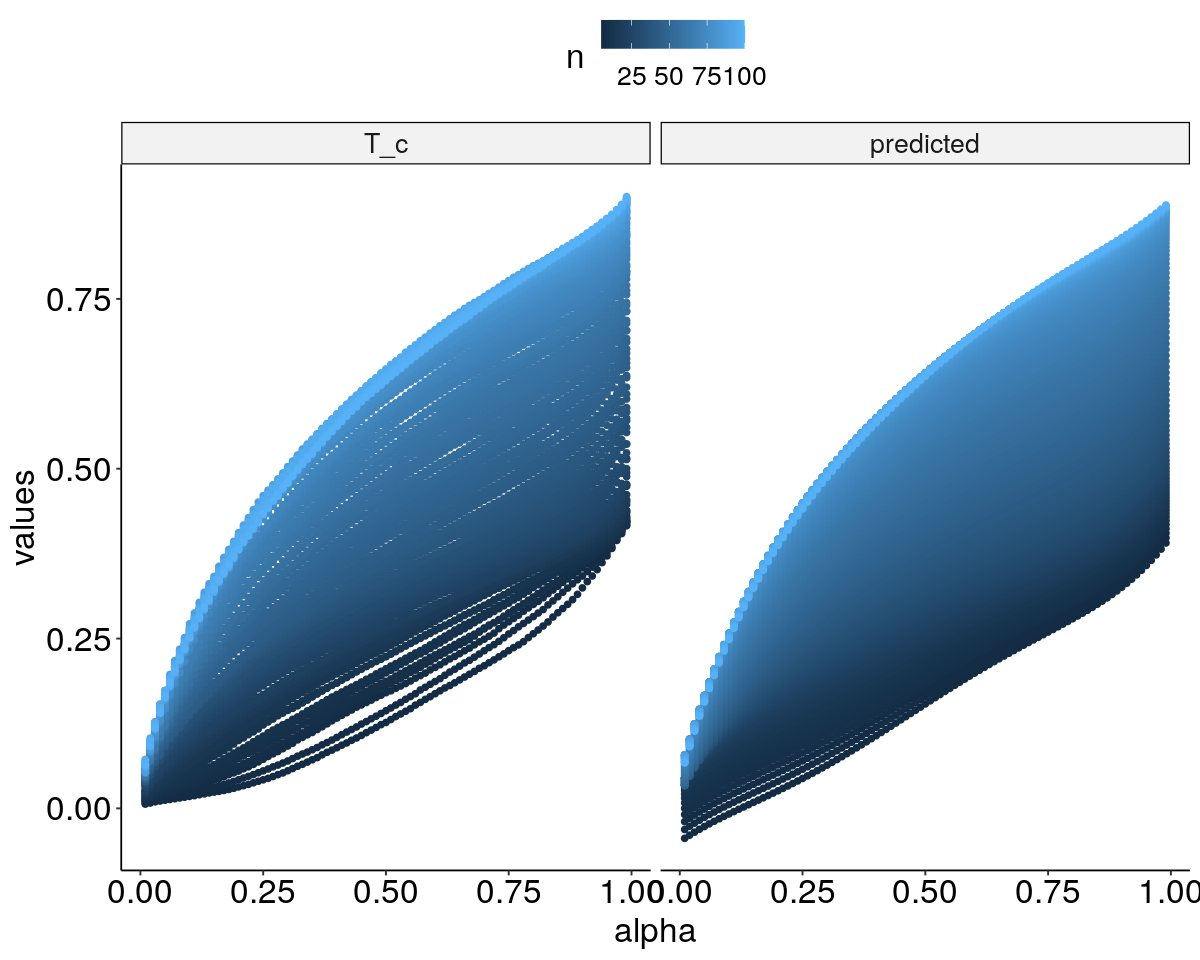

In [26]:
options(repr.plot.width=10, repr.plot.height=8)

ggplot(data=df1, aes(alpha, values)) + 
geom_point(aes(group=n, color=n)) + 
facet_wrap(~ind) + 
theme_pubr() + theme(text = element_text(size=20))

## Save the Plot of Estimated Thresholds

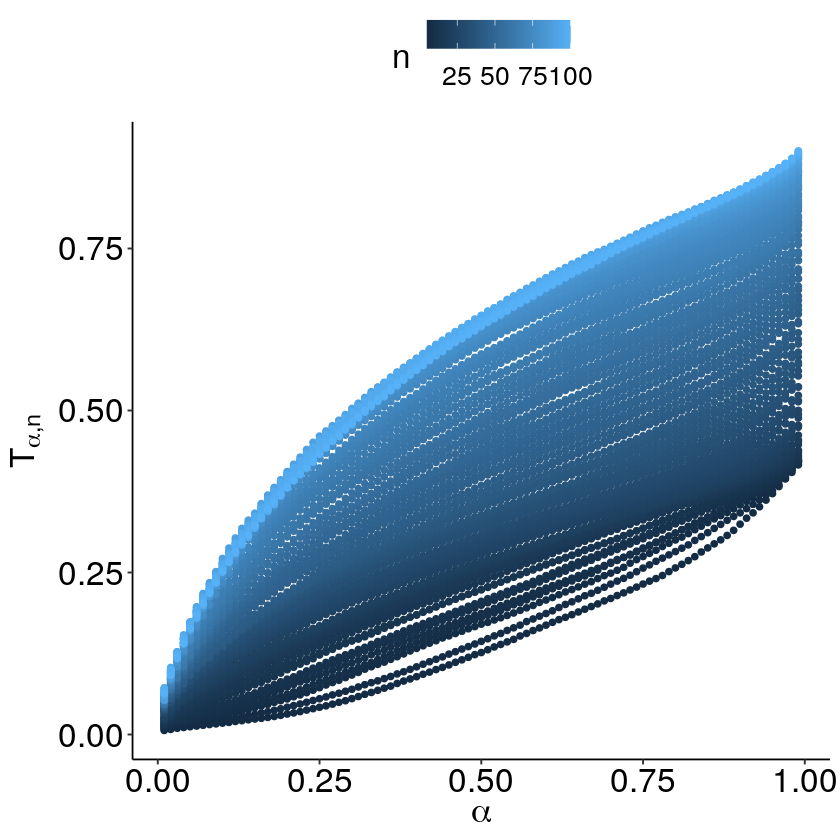

In [28]:
fig(7, 7)
g <- ggplot(data=df, aes(alpha, T_c)) + 
geom_point(aes(color=n)) + 
#geom_line(aes(y=predicted, group=n, color=n)) +
theme_pubr() + theme(text = element_text(size=20)) + xlab(TeX(r'($\alpha$)')) + ylab(TeX(r'($T_{\alpha, n}$)'))

g

In [29]:
ggsave('reports/t_alpha_n.pdf', g)
ggsave('reports/t_alpha_n.eps', g)

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

